In [1]:
import helpers as h
import schwarz_preconditioners as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 9
N = 3
A, b = h.assemble_fem_problem(n)

In [3]:
partition = np.zeros((9, (100)))

for i in range(10):
    for j in range(10):
        
        # Omega 1
        if (i<=4 and j<=4):
            partition[0, i + 10*j] = 1
        
        # Omega 2
        if (i>=2 and i<=7 and j<=4):
            partition[1, i + 10*j] = 1
        
        # Omega 3
        if (i>=5 and j<=4):
            partition[2, i + 10*j] = 1
        
        # Omega 4
        if (i<=4 and j>=2 and j<=7):
            partition[3, i + 10*j] = 1
        
        # Omega 5
        if (i>=2 and i<=7 and j>=2 and j<=7):
            partition[4, i + 10*j] = 1
            
        # Omega 6
        if (i>=5 and j>=2 and j<=7):
            partition[5, i + 10*j] = 1
            
        # Omega 7
        if (i<=4 and j>=5):
            partition[6, i + 10*j] = 1
            
        # Omega 8
        if (i>=2 and i<=7 and j>=5):
            partition[7, i + 10*j] = 1
        
        # Omega 9
        if (i>=5 and j>=5):
            partition[8, i + 10*j] = 1

partition = partition.T

num_subdomains = partition.shape[1]

Omega_ovlp = [partition[:, i].nonzero()[0] for i in range(num_subdomains)]
Omega_i_ovlp = Omega_ovlp[0]
Ai = A[Omega_i_ovlp[:, None], Omega_i_ovlp]

CG iteration 1, residual = 1.2430264721561664
CG iteration 2, residual = 0.2959234292220508
CG iteration 3, residual = 0.14033460033245676
CG iteration 4, residual = 0.052114569038215396
CG iteration 5, residual = 0.008543904272939901
CG iteration 6, residual = 0.0003221150587159629
CG iteration 7, residual = 9.982219605585397e-05
CG iteration 8, residual = 2.391953023992386e-16


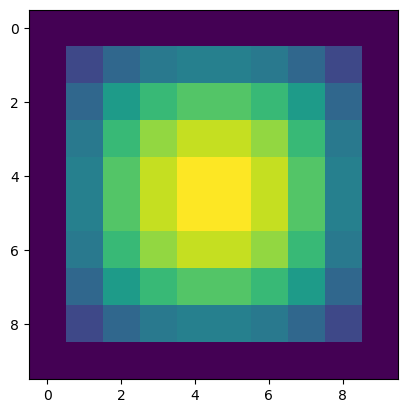

In [4]:
one_level = sp.OneLevelOASPreconditioner(A, partition)
x0 = np.zeros_like(b)

u_approx = h.cg(A, b, tol=1e-6, maxiter=200, x0=x0, pre=one_level.apply)
res = u_approx.reshape(10,10)
plt.imshow(res)
plt.show()

In [10]:
print(Phi.shape)
print(A)

(49, 16)
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 11)	2.6666666666666674
  (12, 11)	-0.3333333333333335
  (21, 11)	-0.3333333333333335
  (22, 11)	-0.3333333333333335
  (11, 12)	-0.3333333333333335
  (12, 12)	2.6666666666666674
  (13, 12)	-0.3333333333333335
  (21, 12)	-0.3333333333333335
  (22, 12)	-0.3333333333333335
  (23, 12)	-0.3333333333333335
  (12, 13)	-0.3333333333333335
  (13, 13)	2.6666666666666674
  (14, 13)	-0.3333333333333335
  (22, 13)	-0.3333333333333335
  :	:
  (77, 86)	-0.33333333333333337
  (85, 86)	-0.33333333333333387
  (86, 86)	2.666666666666668
  (87, 86)	-0.33333333333333304
  (76, 87)	-0.33333333333333337
  (77, 87)	-0.3333333333333338
  (78, 87)	-0.3333333333333335
  (86, 87)	-0.33333333333333304
  (87, 87)	2.666666666666668
  (88, 87)	-0.33333333333333387
  (77, 88)	-0.3333333333333335
  (78, 88)	-0.3333333333333338
  (87, 88)	-0.33333333333333387
  (

In [6]:
Phi = h.assemble_prolongation_operator(N, n)
two_level = sp.TwoLevelOASPreconditioner(A, partition, Phi)

x0 = np.zeros_like(b)

u_approx = h.cg(A, b, tol=1e-6, maxiter=200, x0=x0, pre=two_level.apply)
res = u_approx.reshape(10,10)
plt.imshow(res)
plt.show()

ValueError: dimension mismatch